# Findings from the corpus analysis

My thesis involves analysing the lexicogrammatical features of an online support
group for bipolar disorder. These features are then linked to discourse and
semantics via systemic functional linguistic theory. To do this, I rely on
corpus/computational linguistic techniques. A lot of the work is done by a
purpose-built Python module, *corpkit*.

This Notebook contains an analysis of Mood features in the forum. To do this, I rely on constituency
grammar and Tregex.

This Notebook contains the code used to generate key tables and figures in the
thesis, as well as a few extra details here and there. If you have the dataset,
it can be used to reproduce or modify findings. You could also use the code to
investigate your own data.

As in the thesis' findings chapters, this notebook is divided into *Shallow*, *Mood* and
*Transitivity* features of the corpus. At the end, other corpora based on the same data
are also used.

<!-- MarkdownTOC -->

- [Getting started](#getting-started)
- [Loading data from file](#loading-data-from-file)
- [Counting shallow features](#counting-shallow-features)

<!-- /MarkdownTOC -->

<a name="getting-started"></a>
## Getting started

Before we start doing anything substantial, we need to set some display options,
and import some modules:

In [9]:
# table viewing parameters
import pandas as pd
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', None)
pd.set_option('display.precision', 2)
pd.set_option('expand_frame_repr', True)

# display html table
from IPython.display import display, HTML

# move to correct directory
import os
os.chdir('/Users/daniel/work/new_thesis/')

# allow interactive inline images
%matplotlib inline

With this done, we are ready to import *corpkit*, and create an object
representing our four corpora, which have already been parsed:

In [95]:
# corpus and interrogation classes
from corpkit import *
# wordlists
from dictionaries import *

In [ ]:
# load saved adds saved interrogations as attributes
corpora = Corpora('data', load_saved=True)

In [60]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """remove extreme values from colourmap"""
    import matplotlib.colors as colors
    import numpy as np
    new_cmap = colors.LinearSegmentedColormap.from_list(
    'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
    cmap(np.linspace(minval, maxval, n)))
    return new_cmap

import matplotlib.pyplot as plt
cmap = truncate_colormap(plt.get_cmap('viridis'), 0.2, 0.7)

<a name="loading-data-from-file"></a>
## Loading data from file

Investigations take a long time to run. This cell maps saved data to the local
namespace. It's only useful if you have saved the interrogations.

Interrogations can take hours on a small machine. Therefore, after an interrogation
has been run, it is saved, and loaded as a corpus attribute in the cell above.

To save some time, we can map some loaded interrogations to the local namespace. If you're 
running this notebook locally, and haven't got the saved data, you don't need to run the
following cell.

In [3]:
sents = corpora.P.sents_with_verb
modals_w = corpora.P.modals_w
modals_l = corpora.P.modals_l
modal_configs = corpora.P.modal_configs
pronountense = corpora.P.pronoun_tense
tense = corpora.P.tense
negation = corpora.P.negation
mp = corpora.P.mod_pol
sp = corpora.P.sub_pol
participants = corpora.P.participants
nom_participants = corpora.P.parts_minimal
processes=corpora.P.processes
behave = corpora.P.behave.results
diag = corpora.P.diagnose
expdiag = corpora.P.raw_diag
diagwc = corpora.P.diag_pos
left_participant_in = corpora.P.left_participant_in
right_participant_in = corpora.P.right_participant_in
and_or = corpora.P.and_or
counts = corpora.P.four_part_count
part_configs = {'The self': corpora.P.self,
                'Other members':  corpora.P.other_members,
                'Health professionals':  corpora.P.health_professional,
                'Friends and family': corpora.P.friends_and_family}

Within the `corpora` object, each corpus can be accessed as an attribute:

In [6]:
corpora.C

<corpkit.corpus.Corpus instance: C-parsed; 2 subcorpora>

Because we're mostly working with the P Corpus, we can create a simpler
reference for it:

In [4]:
corpus = corpora.P

Each corpus has subcorpora, as well as files:

In [6]:
list(corpora.C.subcorpora)

[<corpkit.corpus.Subcorpus instance: dropout>,
 <corpkit.corpus.Subcorpus instance: future-veteran>]

In [7]:
corpora.C.subcorpora[0].files[78]

<corpkit.corpus.File instance: user-*PrincessRulerOfTheWorld*-2.txt.xml>

Using CoreNLP XML, it is possible to get lexicogramatical feature of any file
directly:

In [8]:
corpora.C.subcorpora[0].files[78].document.sentences[0].parse_string

'(ROOT (S (NP (PRP I)) (VP (VBP HATE) (NP (NNS THIS))) (. !))) '

There are specific functions for counting and tabulating these features,
however, which we will use instead.

<a name="counting-shallow-features"></a>
## Counting shallow features

To begin, we count some shallow features in the corpus: number of words,
clauses, sentences, and so on. These can be used to calculate relative
frequencies at later stages. Requesting the `features` attribute of a corpus or
corpora generates these statistics via a series of constituency and dependency
queries.

In [6]:
# takes a long time, but each only needs to be run once!
corpus.features

,Characters,Clauses,Closed class,Closed interrogative,Imperative,Interrogative,Mental processes,Modalised declarative,Open class,Open interrogative,Passives,Relational processes,Sentences,Tokens,Unmodalised declarative,Verbal processes,Verbless clause,Words
1,4379147,275949,641385,790,517,4999,11548,3705,616721,780,15212,11053,66419,1258106,35697,2958,12161,1091791
2,3183316,208024,470645,443,481,3400,8919,3107,450840,534,9227,8366,49522,921485,25817,2570,9305,799652
3,2591121,171584,384840,366,413,2813,7450,2845,367600,452,7159,7058,40990,752440,21353,2110,7566,652288
4,3268430,217080,485557,513,554,3711,9547,3732,464323,654,8744,9051,52001,949880,26900,2673,10019,821790
5,3175501,210709,473842,457,558,3522,8961,3626,450352,539,8535,8692,50134,924194,26014,2753,9615,799178
6,3200662,210799,479339,465,605,3653,9068,3895,452852,541,8007,8847,49956,932191,25035,2746,10161,801134
7,3090457,203543,465070,424,532,3351,8659,3640,438015,509,7850,8594,47828,903085,24042,2681,10323,773849
8,3353574,218331,500546,423,621,3496,9238,3939,471303,587,8923,9573,50075,971849,25061,2842,10778,832544
9,2906638,191779,432700,430,599,3146,8408,3840,407417,527,7510,8735,44455,840117,21536,2588,9517,724751
10,2868174,185905,421391,576,456,3181,8081,4336,393552,571,7864,8955,40634,814943,20690,2733,9560,708817


In [7]:
corpus.postags

,nn,prp,in,rb,dt,jj,vb,vbp,cc,nns,vbd,vbz,to,prp$,vbg,...,jjr,ex,jjs,rbr,uh,pos,ls,pdt,rbs,nnps,sym,wp$,np,$,vp
01,137006,125509,118054,91899,78602,72149,62106,57263,51140,44246,42306,33398,33300,27533,27751,...,3450,1997,2116,1736,1302,1116,1489,1186,446,148,61,12,3,0,1
02,97978,94476,85528,68997,57438,50601,49122,42972,35594,32109,27918,26032,25241,20843,20142,...,2906,1572,1799,1483,1082,925,1174,933,300,112,56,16,0,0,0
03,80387,77852,69607,56806,47448,41079,40954,35063,28533,25358,22280,21511,20723,16633,16281,...,2368,1380,1517,1240,954,807,957,692,200,105,36,8,0,0,0
04,102384,97678,87268,71008,59703,51584,52204,44600,35468,31790,27175,27205,25947,20967,20214,...,3026,1799,1839,1547,1238,1078,1354,892,289,162,51,21,0,1,0
05,98219,96434,85186,68493,58673,50325,50815,43746,34276,30934,26297,26011,25475,19806,19533,...,2986,1896,1822,1525,1281,1074,835,904,308,155,45,12,0,0,0
06,99931,95954,85531,68458,59968,50945,51219,43587,33556,30461,25577,25967,24996,19701,19465,...,3022,1883,1767,1545,1380,1057,713,828,320,167,69,16,0,0,0
07,96294,92363,81960,66103,58074,49436,49527,41898,33016,29098,23979,25729,24360,19195,18699,...,2961,1910,1769,1541,1318,1159,829,829,315,189,59,12,0,2,0
08,104017,97721,90534,70225,62829,53997,53041,43225,35479,32405,27030,26665,26269,20177,19853,...,3312,2101,1874,1606,1473,1455,837,870,322,196,79,10,0,0,0
09,89237,85642,78635,60548,55111,45094,48412,38238,30396,27593,20998,23821,23394,17532,17870,...,3111,1889,1701,1432,1378,1133,347,631,333,147,53,14,0,0,0
10,87789,80730,81297,54981,55088,43609,48429,34918,28975,27878,20003,23543,24138,18745,17923,...,2926,1987,1471,1563,1387,1241,130,674,334,154,41,17,0,0,0


In [8]:
corpus.wordclasses

,Verb,Noun,Pronoun,Preposition,Adverb,Determiner,Adjective,Coordinating conjunction,To,Modal,Cardinal number,Bracket,Wh-adverb,Foreign word,Particle,Wh- pronoun,Wh-determiner,Ex. there,Interjection,Possessive ending,List item marker,Predeterminer,Symbol,np,vp,Other
01,248653,195457,153042,118054,94081,78602,77715,51140,33300,18407,14911,9342,8251,9491,6771,6010,4706,1997,1302,1116,1489,1186,61,3,1,0
02,182675,141397,115319,85528,70780,57438,55306,35594,25241,14481,9258,6513,6384,6882,4954,4642,3555,1572,1082,925,1174,933,56,0,0,0
03,148870,114904,94485,69607,58246,47448,44964,28533,20723,12335,7128,5154,5287,5293,4219,3836,2874,1380,954,807,957,692,36,0,0,0
04,187289,146828,118645,87268,72844,59703,56449,35468,25947,16069,8678,6407,6783,6229,5071,4964,3716,1799,1238,1078,1354,892,52,0,0,0
05,181949,141982,116240,85186,70326,58673,55133,34276,25475,15529,8285,6937,6589,5215,5051,4892,3589,1896,1281,1074,835,904,45,0,0,0
06,180712,144893,115655,85531,70323,59968,55734,33556,24996,16188,8047,7944,6819,5115,4781,4867,3829,1883,1380,1057,713,828,69,0,0,0
07,173912,140711,111558,81960,67959,58074,54166,33016,24360,15481,7700,7929,6534,4316,4637,4694,3517,1910,1318,1159,829,829,61,0,0,0
08,185493,152981,117898,90534,72153,62829,59183,35479,26269,16911,7857,9761,6874,4060,5013,5263,4121,2101,1473,1455,837,870,79,0,0,0
09,162035,131809,103174,78635,62313,55111,49906,30396,23394,16205,6860,8370,6258,2281,4668,4655,3610,1889,1378,1133,347,631,53,0,0,0
10,156819,130567,99475,81297,56878,55088,48006,28975,24138,16420,7004,7551,6394,935,4364,4586,3733,1987,1387,1241,130,674,41,0,0,0


Many of these features don't tell us much on their own. From them, however, we can derive some useful statistics. We can make a function that does this for any corpus in our collection:

In [9]:
def derive_features(corpus):
    """Take a corpus object, return shallow features like lexical density etc"""
    import pandas as pd
    datapoints = []
    
    res = corpus.features['Characters'] / corpus.features['Words']
    res.name = 'Characters per word'
    datapoints.append(res)

    res = corpus.features['Open class'] / corpus.features['Clauses']
    res.name = 'Lexical density'
    datapoints.append(res)
    
    res = corpus.features['Words'] / corpus.features['Sentences']
    res.name = 'Words per sentence'
    datapoints.append(res)

    res = corpus.features['Clauses'] / corpus.features['Sentences']
    res.name = 'Clauses per sentence'
    datapoints.append(res)

    res = corpus.wordclasses['Noun'] / corpus.wordclasses['Verb']
    res.name = 'Noun/verb ratio'
    datapoints.append(res)

    res = corpus.wordclasses['Noun'] * 100.0 / corpus.features['Tokens']
    res.name = 'Percentage nouns'
    datapoints.append(res)

    res = corpus.wordclasses['Noun'] / corpus.features['Clauses']
    res.name = 'Nouns per clause'
    datapoints.append(res)

    res = corpus.wordclasses['Verb'] * 100.0 / corpus.features['Tokens']
    res.name = 'Percentage verbs'
    datapoints.append(res)
    
    #wpc = corpus.features['Words'] / corpus.features['Clauses']
    #wpc.name = 'Words per clause'
    #datapoints.append(wpc)

    return pd.concat(datapoints, axis = 1)

In [12]:
# corpus.wordclasses.index = range(1, 11)
shallow = derive_features(corpus)
shallow

,Characters per word,Lexical density,Words per sentence,Clauses per sentence,Noun/verb ratio,Percentage nouns,Nouns per clause,Percentage verbs
1,4.01,2.23,16.44,4.15,0.79,15.54,0.71,19.76
2,3.98,2.17,16.15,4.20,0.77,15.34,0.68,19.82
3,3.97,2.14,15.91,4.19,0.77,15.27,0.67,19.78
4,3.98,2.14,15.80,4.17,0.78,15.46,0.68,19.72
5,3.97,2.14,15.94,4.20,0.78,15.36,0.67,19.69
6,4.00,2.15,16.04,4.22,0.80,15.54,0.69,19.39
7,3.99,2.15,16.18,4.26,0.81,15.58,0.69,19.26
8,4.03,2.16,16.63,4.36,0.82,15.74,0.70,19.09
9,4.01,2.12,16.30,4.31,0.81,15.69,0.69,19.29
10,4.05,2.12,17.44,4.58,0.83,16.02,0.70,19.24


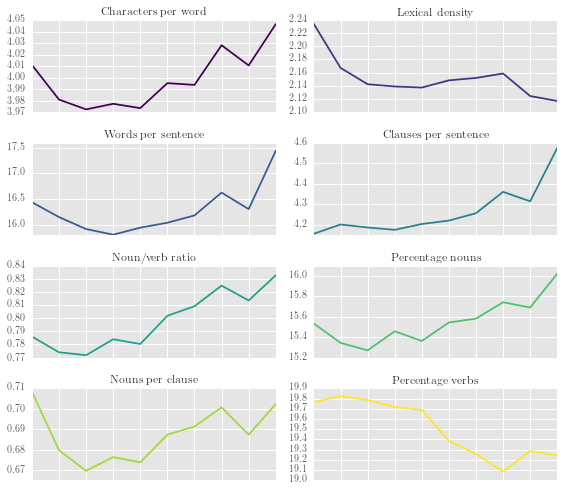

In [18]:
shallow.visualise(subplots=True,layout=(4, 2), figsize=(8, 7)).show()

As noted in the thesis, we can see that first posts often have a different trajectory to non-first posts. We can also see that some features vary consistently and considerably over time.